<a href="https://colab.research.google.com/github/beatricexc/Python-Party/blob/main/RegexTheoryAISweigart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

**1.  Matching Multiple Groups with the Pipe | <--**

</br>

The | can be used anywhere to match one of many expressions. Eg. the regular expression r'Storm|Gloria Allred' will match either 'Storm' or 'Gloria Allred'

When both Sorm and Gloria Allred occur in the searched string, the first occurrence of matching will be returned as the Match object.


In [15]:
import re
heroRegex = re.compile (r'Storm|Gloria Allred')
mo1 = heroRegex.search('Storm and Gloria Allred.')
mo1.group() #Returns 'Storm'
mo2 = heroRegex.search('Gloria Allred and Storm.')
mo2.group() #Returns 'Gloria Allred'

'Gloria Allred'

The pipe can also be used to match several patterns as part of the regex. Eg. You wanted to match any of the string "Batwoman", 'Batmobile', 'Batcopter', and 'Batbat'. They all start with *bat* so we can specify it just once with ()


In [ ]:
batRegex=re.compile(r'Bat(woman|mobile|copter|bat)')
mo = batRegex.search('Batmobile lost a wheel')
mo.group() #Returns 'Batmobile'
mo.group(1) #Returns 'mobile'

'mobile'


**Optional Matching with the Question Mark ? <--** 

The Regex should find a match whether or not that bit of text is there with the '?' character which flags the group that *preceds* it as an optional part of the pattern.
We can think of the ? as saying "Match zero or one of the group preceding this question mark"

In [ ]:
batRegex = re.compile(r'Bat(wo)?man')
mo1 = batRegex.search('The Adventures of Batman')
mo1.group() 

'Batman'

In [ ]:
batRegex = re.compile(r'Bat(wo)?man')
mo2 = batRegex.search('The Adventures of Batwoman')
mo2.group()


'Batwoman'

In [ ]:
phoneRegex = re.compile(r'(\d\d\d-)?\d\d\d-\d\d\d\d') # the Regex will look for phone numbers that do or do not have an area code as \d stands for any numeric digit
mo1 = phoneRegex.search('My phone numbes is 415-555-4242')
mo1.group() #returns '415-555-4242'
mo2 = phoneRegex.search('My phone number is 555-4242')
mo2.group() #returns '555-4242'

'555-4242'

**Matching Zero or More with the Star * <--**

The *  (called the star  or asterisk ) means “match zero or more”—the group that precedes the star can occur any number of times in the text. It can be completely absent or repeated over and over again. Let’s look at the Batman example again.

In [ ]:
batRegex = re.compile(r'Bat(wo)*man')
mo1 = batRegex.search('The Adventures of Batwoman')
mo1.group() #returns 'Batwoman

'Batwoman'

In [ ]:
mo2 = batRegex.search('The Adventures of Batman')
mo2.group() #returns 'Batman'

'Batman'

In [ ]:
mo3 = batRegex.search('The adventures of Batwowowowowowowoman')
mo3.group()

'Batwowowowowowowoman'

For 'Batman' , the (wo)*  part of the regex matches zero instances of wo  in the string; for 'Batwoman' , the (wo)*  matches one instance of wo ; and for 'Batwowowowowowowoman' , (wo)*  matches 7 instances of wo .

**Matching One or More with the Plus + <--** 

The plus means match one or more, meaning the group preceeding the + must appear at least once in the string.

In [3]:
batRegex= re.compile(r'Bat(wo)+man')
mo1 = batRegex.search('The Adventures of Batwoman')
mo1.group()

'Batwoman'

In [4]:
mo2 = batRegex.search('The Adventures of Batwowowoman')
mo2.group()

'Batwowowoman'

In [7]:
mo3 = batRegex.search('The Adventures of Batman')
mo3 == None #The regex Bat(wo)+man  will not match the string 'The Adventures of Batman'  because at least one wo  is required by the plus sign.

True

**Matching Specific  Repetitions with Curly Brackets {} <--**

When we want to repeat a group a specific number of times, we have to follow the group in the regex with a number in the curly brackets.

E.g.: (ha){3} will match the string 'hahaha' , but will not match 'haha', since the latter has only 2 repeats of the (ha) group.

Specifying a range: (ha){3,5} will match 'hahaha' 'hahahaha' and 'hahahahaha'

In [9]:
haRegex = re.compile(r'(Ha){3}')
mo1 = haRegex.search('HaHaHa')
mo1.group()

'HaHaHa'

In [11]:
mo2 = haRegex.search('Ha')
mo2 == None #Here, (Ha){3}  matches 'HaHaHa'  but not 'Ha' . Since it doesn’t match 'Ha' , search()  returns None .

True

**Greedy and Nongreedy Matching**

The reason Python returns 'hahahahaha' instead of the shorter possibilites is because Python's regular expressions are *greedy* by default , which  means that in ambiguous situations they will match the longest string possible. 

The *non-greedy* version of the curly brackets has the closing curly bracket followed by a '?'

In [13]:
greedyHaRegex = re.compile(r'(Ha){3,5}')
mo1 = greedyHaRegex.search('HaHaHaHaHa')
mo1.group()

'HaHaHaHaHa'

In [19]:
nongreedyHaRegex = re.compile(r'(Ha){3,5}?')
mo2 = nongreedyHaRegex.search('HaHaHaHaHa')
mo2.group()

'HaHaHa'

**The Findall() Method**

In addition to the search() method, Regex objects also have a findall() method. While search() will return a Match object of the *first* matched text in the searched string, the finall() method will return the strings of *every* match int he searched string. 

In [20]:
phoneNumRegex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')
mo = phoneNumRegex.search('Cell: 415-555-9999')
mo.group()

'415-555-9999'

In [26]:
phoneNumRegex= re.compile(r'\d\d\d-\d\d\d-\d\d\d\d') #has no groups
phoneNumRegex.findall('Cell: 414-555-9999 Work: 212-555-0000') 

['414-555-9999', '212-555-0000']

In [27]:
#If there are groups in the regular expression, then findall() will return a list of tuples where each tuple is a list of a found match

phoneNumRegex = re.compile(r'(\d\d\d)-(\d\d\d)-(\d\d\d\d)') #has groups delimited by ()
phoneNumRegex.findall('Cell 415-555-9999 Work: 211-555-0000')

[('415', '555', '9999'), ('211', '555', '0000')]

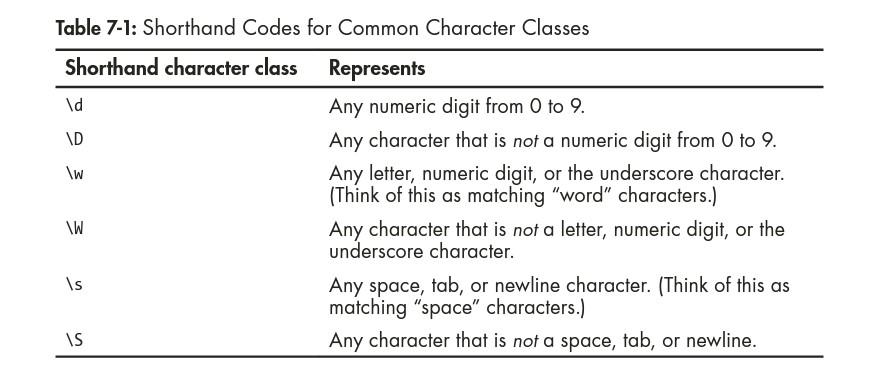

In [31]:
#Character classes are good for shorthening regular expressions.
#The character class [0-5] will match only the numbers 0 to 5; which is much shorter than typing (0|1|2|3|4|5)

xmasRegex = re.compile(r'\d+\s\w+')
xmasRegex.findall('12 drummers, 11 pipers, 10 ladies, 9 boys, 8 butlers, 7 swans, 6 geese, 5 rings, 4 birds, 3 hens, 2 doves, 1 partrige')

#The regular expression \d+\s\w+  will match text that has one or more numeric digits ( \d+ ), followed by a whitespace character ( \s ), 
#followed by one or more letter/digit/underscore characters ( \w+ )

['12 drummers',
 '11 pipers',
 '10 ladies',
 '9 boys',
 '8 butlers',
 '7 swans',
 '6 geese',
 '5 rings',
 '4 birds',
 '3 hens',
 '2 doves',
 '1 partrige']

**Making your own Character Classes with sqaure brackets [] <--**

We can also make negative character classes with the caret ^ sign



In [33]:
vowelRegex = re.compile(r'[aeiouAEIOU]') #the character class [aeiouAEIOU] will match any vowel, both lower case and uppercase.
vowelRegex.findall('RoboCop eats baby food. BABY FOOD.')

['o', 'o', 'o', 'e', 'a', 'a', 'o', 'o', 'A', 'O', 'O']

In [34]:
consonantRegex = re.compile(r'[^aeiouAEIOU]')
consonantRegex.findall('RoboCop eats baby poo. BABY POO.')

['R',
 'b',
 'C',
 'p',
 ' ',
 't',
 's',
 ' ',
 'b',
 'b',
 'y',
 ' ',
 'p',
 '.',
 ' ',
 'B',
 'B',
 'Y',
 ' ',
 'P',
 '.']

**The Wildcard Character .(or dot) <--**

- this will match any new character except for a new line


In [36]:
atRegex = re.compile(r'.at')
atRegex.findall('The cat in the has sat on the flat mat.')
#Remember that the dot character will match just one character, which is why the match for the text flat in the example matched only lat

['cat', 'sat', 'lat', 'mat']

**Matching Everything with the dot star .* <--**

- the dot-star uses *greedy* mode 
- the dot-star-question mark uses the *nongreedy* mode   -->   .*?


In [38]:
nongreedyRegex = re.compile(r'<.*?>')
mo =nongreedyRegex.search('<To serve man> for dinner.>')
mo.group()

'<To serve man>'

In [41]:
greedyRegex = re.compile(r'<.*>')
mo = greedyRegex.search('<To serve man> for dinner.')
mo.group()

'<To serve man>'

**Matching new lines with the Dot Character** 

By passing re.DOTALL  as the second argument to re.compile() , you can make the dot character match all  characters, including the newline character.

In [43]:
noNewLineRegex = re.compile(r'.*')
noNewLineRegex.search('Serve the public trust. \nProtect the innocent.\nUphold the law').group()


'Serve the public trust. '

In [44]:
newlineRegex = re.compile(r'.*', re.DOTALL)
newlineRegex.search('Serve the public trust. \nProtect the innocent.\nUphold the law.').group()

'Serve the public trust. \nProtect the innocent.\nUphold the law.'

The regex noNewlineRegex , which did not have re.DOTALL  passed to the re.compile()  call that created it, will match everything only up to the first newline character, whereas newlineRegex , which did  have re.DOTALL  passed to re.compile() , matches everything. This is why the newlineRegex.search()  call matches the full string, including its newline characters.

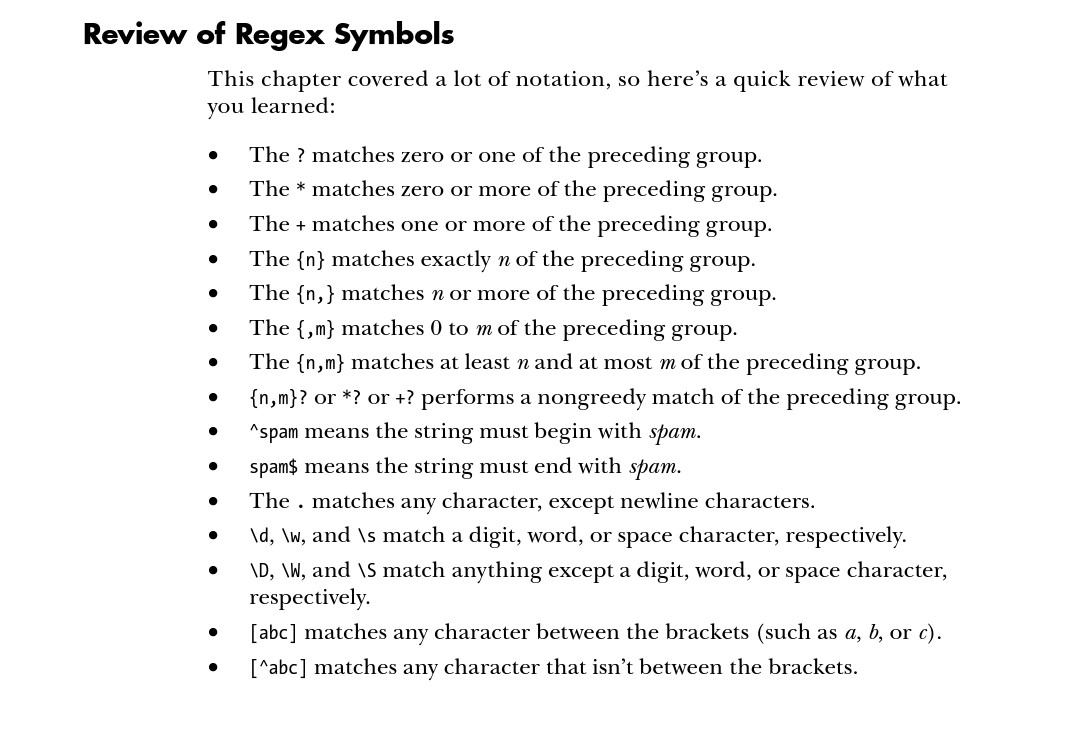

**Case-Insensitve matching** 

To make the regex case-insensitive , we pass re.INGNORECASE or re.I as a second argument to re.compile()

In [47]:
wonderwoman = re.compile(r'wonderwoman', re.I)
wonderwoman.search('Wonderwoman is part woman, part goddess, all strength.').group()

'Wonderwoman'

In [48]:
wonderwoman.search('WONDERWOMAN protects the innocent.').group()

'WONDERWOMAN'

In [52]:
wonderwoman.search('Hey,boy, do you agree that wonderwoman is stronger than superman?').group()

'wonderwoman'

**Substituting Strings with the sub() Method**

The sub() method for Regex objects is passed two arguments: 
- the 1st arg is a string to replace any matches 
- the 2nd is the string for the regular expression,


NOTE: the sub() method returns a string with the substitutions applied 

In [54]:
namesRegex= re.compile(r'Agent \w+')
namesRegex.sub('CENSORED', 'Agent Bob gave the secret documents to Agent Alice.')

'CENSORED gave the secret documents to CENSORED.'

In [57]:
agentNameRegex = re.compile(r'Agent (\w)\w*')
agentNameRegex.sub(r'\1****', 'Agent Alice told Agent Carol that Agent Eve knew Agent Bob is a double  agent.')

'A**** told C**** that E**** knew B**** is a double  agent.'

**Complex Regexes** with re.verbose, re.IGNORECASE, re.DOTALL

This “verbose mode” can be enabled by passing the variable re.VERBOSE  as the second argument to re.compile() and it tells the re.compile()  function to ignore whitespace and comments inside the regular expression string. 

- if we want to to use re.verbose to write comments but also to use re.IGNORECAE to ignore capitalization we can combine re.IGNORECASE, re.DOTALL, and re.VERBOSE variables using the pipe character (|), which in this context is known as the *bitwise* operator.

someRegexValue = re.compile('foo', re.IGNORECASE | re.DOTALL) </br>
someRegexValue = re.compile('foo', re.IGNORECASE | re.DOTALL | re.VERBOSE)